<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

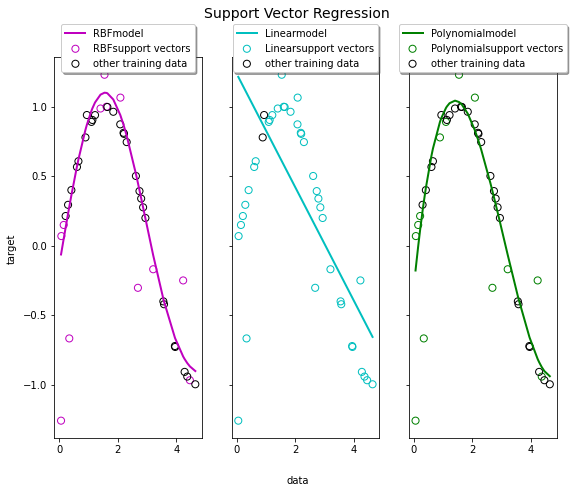

In [7]:
from sklearn.svm import SVR#서포트 벡터 회귀
import numpy as np#벡터와 행렬 연산
import matplotlib.pyplot as plt#그래프 시각화 위함

X=np.sort(5*np.random.rand(40,1),axis=0)#0~1 표준정규분포 난수 5*(40,1)배열 정렬
y=np.sin(X).ravel()#X의 사인값 1차원 배열로 평평하게
y[::5]+=3*(0.5-np.random.rand(8))#(0.5-8개의 난수값) *3 ->차이값 5로생성

svr_rbf=SVR(kernel='rbf',C=100,gamma=0.1,epsilon=.1)#rbf커널로 패널티값은 100,커널계수는 0.1,입실론값은 0.1로 서포트 벡터 모델생성
svr_lin=SVR(kernel='linear',C=100,gamma='auto')#linear커널로 패널티값은 100,커널계수는 자동,입실론값은 0.1로 서포트 벡터 모델생성
svr_poly=SVR(kernel='poly',C=100,gamma='auto',degree=3,epsilon=.1,coef0=1)#poly커널로 패널티값은 100,커널계수는 자동,입실론값은 0.1,독립적인 구간은 1로 서포트 벡터 모델생성

lw=2#두께 설정
svrs=[svr_rbf,svr_lin,svr_poly]#svrs배열 설정
kernel_label=['RBF','Linear','Polynomial']#kernel_label배열 설정
model_color=['m','c','g']#model_color배열 설정

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(9,7),sharey=True)#3행1열로 figsize만큼의 subplots생성과 fig,axes값 반환
for ix,svr in enumerate(svrs):
  axes[ix].plot(X,svr.fit(X,y).predict(X),color=model_color[ix],lw=lw,label='{}model'.format(kernel_label[ix]))#x,y,값 model_color배열에 해당하는색으로 굵기는 2, 라벨은 해당 커널 model로 산점도 생성
  axes[ix].scatter(X[svr.support_],y[svr.support_],facecolor="none",edgecolor=model_color[ix],s=50,label='{}support vectors'.format(kernel_label[ix]))#x,y,값 model_color배열에 해당하는색으로 라벨은 해당 커널 support vectors로 산점도 생성
  axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)),svr.support_)],y[np.setdiff1d(np.arange(len(X)),svr.support_)],facecolor="none",edgecolor="k",s=50,label='other training data')#x,y,값 k색으로 라벨은 other training data로 산점도 생성
  axes[ix].legend(loc='upper center',bbox_to_anchor=(0.5,1.1),ncol=1,fancybox=True,shadow=True)#범례설정

fig.text(0.5,0.04,'data',ha='center',va='center')#data로 x축에 text설정
fig.text(0.06,0.5,'target',ha='center',va='center',rotation='vertical')#target으로 x축에 text설정
fig.suptitle("Support Vector Regression",fontsize=14)#14크기의 Support Vector Regression으로 소제목설정
plt.show()#그래프 출력
